In [3]:
#Gradient Descent Demo
#Start from review range() and arange() in numpy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(range(5))
print(np.arange(5))
print(range(1,5))
print(np.arange(1,5))
print(range(1,10,2))
print(np.arange(1,10,2))
print(np.arange(-200,-100,1))

range(0, 5)
[0 1 2 3 4]
range(1, 5)
[1 2 3 4]
range(1, 10, 2)
[1 3 5 7 9]
[-200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171
 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156
 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141
 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126
 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111
 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101]


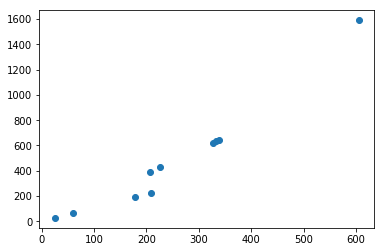

In [34]:
#Gradient Descent 
#Data is from Machine Learning Course provided by Hongli Li, taiwan
#x=pokemon original cp,
#y=pokemon cp after evolution
#The best parameter w and b is giben which is 2.67 and =188.4


x_data=[338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data=[640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]

#try visualise data and review plt
plt.plot(x_data,y_data,'o')
plt.show()

x=np.arange(-200,-100,1) #bias
y=np.arange(-5,5,0.1)    #weight
Z=np.zeros((len(x),len(y)))
#print(x.shape,y.shape,Z.shape)

X,Y=np.meshgrid(x,y)
#print(X.shape,Y.shape)
for i in range(len(x)):
    for j in range(len(y)):
        b=x[i]
        w=y[j]
        Z[j][i]=0
        ##Compute loss function
        for n in range(len(x_data)):
            #Because we are going to plot the contour of loss fucntion
            #So compute the loss function in this case
            Z[j][i]=Z[j][i]+(y_data[n]-b-w*x_data[n])**2 
        Z[j][i]=Z[j][i]/len(x_data)


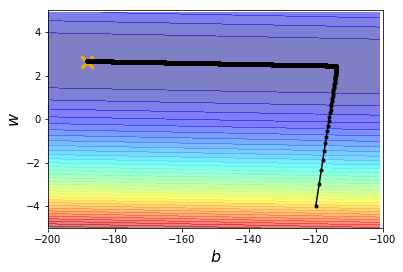

In [37]:
#initial value
w=-4
b=-120
lr=1
iteration=100000

#Because the unity lr cannot make the GD to reach the best solution
#Try to use different lr for parameter
lr_b=0
lr_w=0

b_history=[b]
w_history=[w]


#Iteration for doing GD
for i in range(iteration):
    w_grad=0
    b_grad=0
    
    #Gradident of w and b for loss function
    #w_grad=sum(from 1 to n, 2*(real output - function output)(-x))
    #      =sum(from 1 to n, 2*(y - (b+wx))(-x))
    #b_grad=sum(from 1 to n, 2*(real output - function output)(-1))
    #      =sum(from 1 to n, 2*(y - (b+wx))(-1))
    
    for n in range(len(x_data)):
        w_grad=w_grad+2*(y_data[n]-(b+w*x_data[n]))*(-x_data[n])
        b_grad=b_grad+2*(y_data[n]-(b+w*x_data[n]))*(-1)
    
    lr_w=lr_w+w_grad**2
    lr_b=lr_b+b_grad**2
    
    
    #update parameter for next iteration
    w=w-lr/np.sqrt(lr_w)*w_grad
    b=b-lr/np.sqrt(lr_b)*b_grad
    
    #store parameter for ploting
    b_history.append(b)
    w_history.append(w)


plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.64],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

